In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')
from matplotlib.ticker import FuncFormatter
from matplotlib import ticker

In [2]:
data = pd.read_csv("DATA/Global_YouTube_Statistics.csv", encoding="ISO-8859-1")

data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [4]:
data.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [5]:
data.tail()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501
994,995,Make Joke Of,12300000,2.129774e+09,Comedy,Make Joke Of,62,India,IN,Comedy,...,100000.0,2017.0,Aug,1.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [6]:
data.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [7]:
data.shape

(995, 28)

In [8]:
data.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [9]:
data['category'].unique()

array(['Music', 'Film & Animation', 'Entertainment', 'Education', 'Shows',
       nan, 'People & Blogs', 'Gaming', 'Sports', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [10]:
data['category'].nunique()

18

In [11]:
data.duplicated().sum()

0

In [12]:
data = data.dropna()

In [13]:
data[data['category'].isnull()].head(5)


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude


In [14]:
dropped_features = [
    'Abbreviation', 'created_month', 'created_date', 'Latitude', 'Longitude'
]
data = data.drop(data[dropped_features], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 0 to 994
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     554 non-null    int64  
 1   Youtuber                                 554 non-null    object 
 2   subscribers                              554 non-null    int64  
 3   video views                              554 non-null    float64
 4   category                                 554 non-null    object 
 5   Title                                    554 non-null    object 
 6   uploads                                  554 non-null    int64  
 7   Country                                  554 non-null    object 
 8   channel_type                             554 non-null    object 
 9   video_views_rank                         554 non-null    float64
 10  country_rank                             554 non-null  

In [15]:
numerical_cols = ['subscribers', 'video views', 'uploads', 
                  'lowest_monthly_earnings', 'highest_monthly_earnings', 
                  'lowest_yearly_earnings', 'highest_yearly_earnings',
                  'video_views_for_the_last_30_days', 'subscribers_for_last_30_days']

correlation_matrix = data[numerical_cols].corr()

correlation_matrix

,subscribers,video views,uploads,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,video_views_for_the_last_30_days,subscribers_for_last_30_days
subscribers,1.000000,0.850776,0.074791,0.534713,0.534388,0.534883,0.534721,0.321182,0.361800
video views,0.850776,1.000000,0.147477,0.637991,0.637376,0.638861,0.638019,0.360970,0.203693
uploads,0.074791,0.147477,1.000000,0.155557,0.156062,0.156639,0.155540,0.079308,0.009067
lowest_monthly_earnings,0.534713,0.637991,0.155557,1.000000,0.999937,0.999914,0.999998,0.585838,0.616795
highest_monthly_earnings,0.534388,0.637376,0.156062,0.999937,1.000000,0.999832,0.999935,0.585788,0.617150
lowest_yearly_earnings,0.534883,0.638861,0.156639,0.999914,0.999832,1.000000,0.999912,0.585758,0.615874
highest_yearly_earnings,0.534721,0.638019,0.155540,0.999998,0.999935,0.999912,1.000000,0.585837,0.616816
video_views_for_the_last_30_days,0.321182,0.360970,0.079308,0.585838,0.585788,0.585758,0.585837,1.000000,0.366320
subscribers_for_last_30_days,0.361800,0.203693,0.009067,0.616795,0.617150,0.615874,0.616816,0.366320,1.000000


This code calculates and visualizes the trend in YouTube channel creation over the years using the "created_year" column. Once you've completed this step, you can proceed to the next analysis. If you'd like to continue with the next step or have any questions, please feel free to ask.

In [16]:
yearly_trend = data['created_year'].value_counts().sort_index()


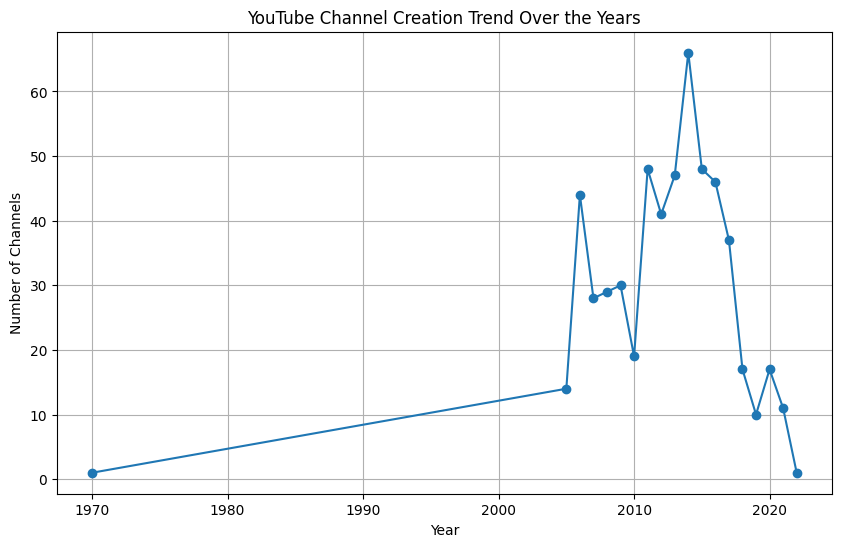

In [17]:
# Visualize the YouTube channel creation trend over the years
plt.figure(figsize=(10, 6))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o', linestyle='-')
plt.title('YouTube Channel Creation Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Channels')
plt.grid(True)
plt.show()

This code calculates and visualizes the number of YouTube channels in each category using a bar plot. It will help you understand which categories have the most channels. If you have any questions or would like to proceed with the next analysis step, please feel free to ask.

In [18]:
# Calculate the number of channels in each category

category_counts = data['category'].value_counts()


In [19]:
category_counts = category_counts.sort_values(ascending=False)
# Sort the categories by the number of channels in descending order


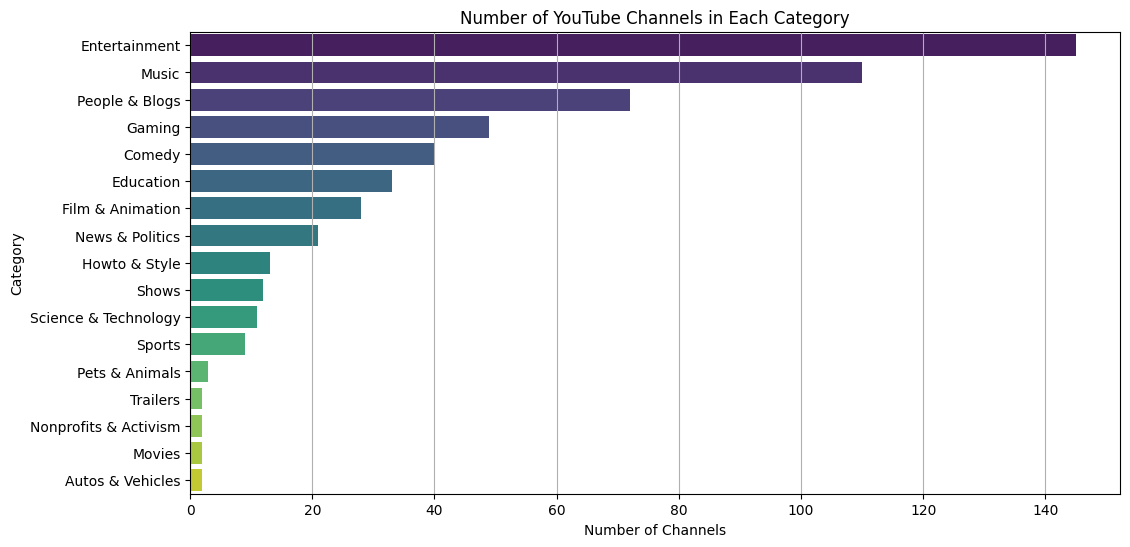

In [20]:
# Visualize the number of channels in each category using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")
plt.title('Number of YouTube Channels in Each Category')
plt.xlabel('Number of Channels')
plt.ylabel('Category')
plt.grid(axis='x')
plt.show()

This code calculates and visualizes the total number of YouTube channels from each country using a bar plot. It will provide insights into which countries have the highest number of YouTube channels. If you have any questions or would like to proceed with the next analysis step, please feel free to ask.

In [21]:
# Calculate the total number of channels from each country
country_counts = data['Country'].value_counts()


In [22]:
# Sort the countries by the total number of channels in descending order
country_counts = country_counts.sort_values(ascending=False)

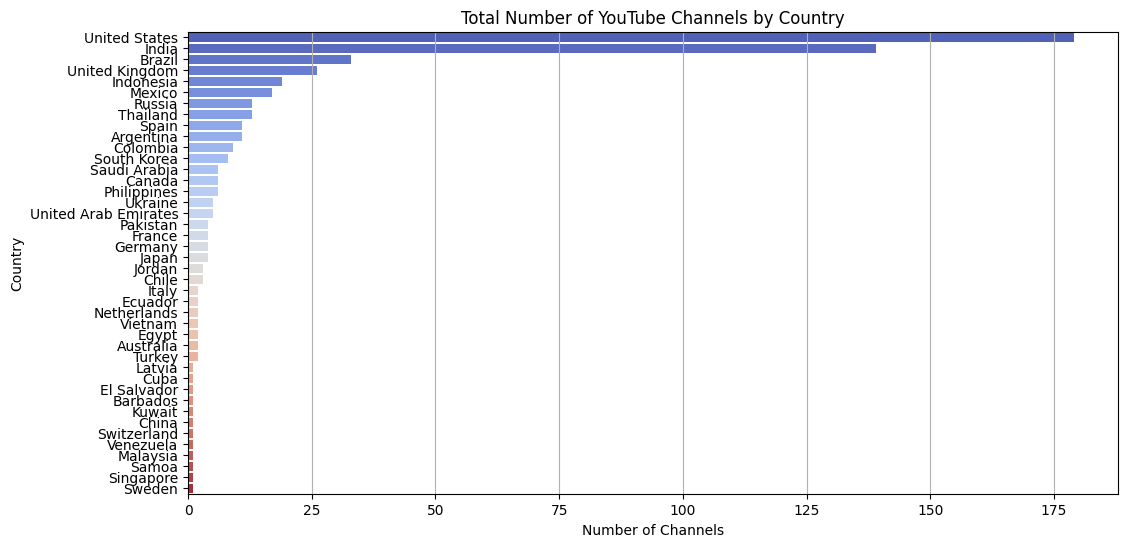

In [23]:
# Visualize the total number of channels from each country using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="coolwarm")
plt.title('Total Number of YouTube Channels by Country')
plt.xlabel('Number of Channels')
plt.ylabel('Country')
plt.grid(axis='x')
plt.show()

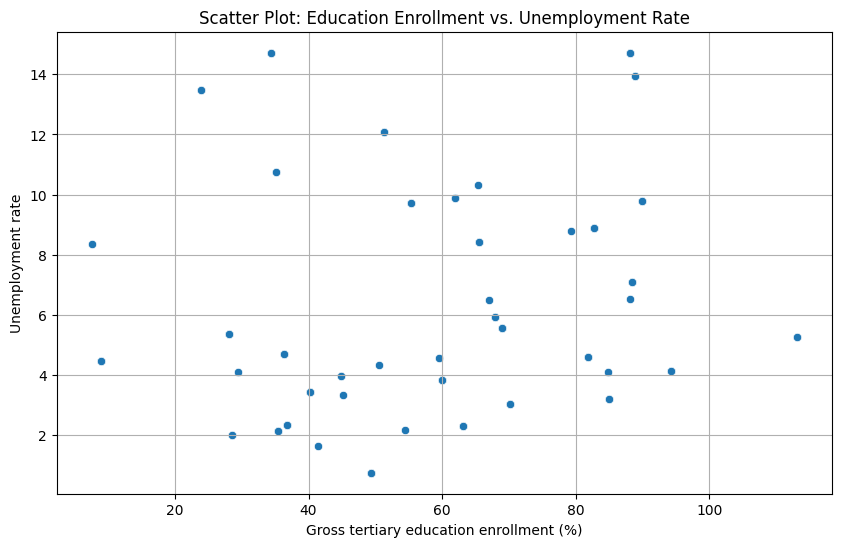

In [24]:
# Scatter plot to analyze the relationship between "Gross tertiary education enrollment (%)" and "Unemployment rate"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gross tertiary education enrollment (%)', y='Unemployment rate', data=data)
plt.title('Scatter Plot: Education Enrollment vs. Unemployment Rate')
plt.xlabel('Gross tertiary education enrollment (%)')
plt.ylabel('Unemployment rate')
plt.grid(True)
plt.show()


Analysis 2: Correlation Matrix Heatmap



In [25]:
# Select numerical columns for correlation analysis
numerical_cols = ['subscribers', 'video views', 'uploads', 
                  'lowest_monthly_earnings', 'highest_monthly_earnings', 
                  'lowest_yearly_earnings', 'highest_yearly_earnings',
                  'video_views_for_the_last_30_days', 'subscribers_for_last_30_days']


In [26]:
# Calculate the correlation matrix
correlation_matrix = data[numerical_cols].corr()


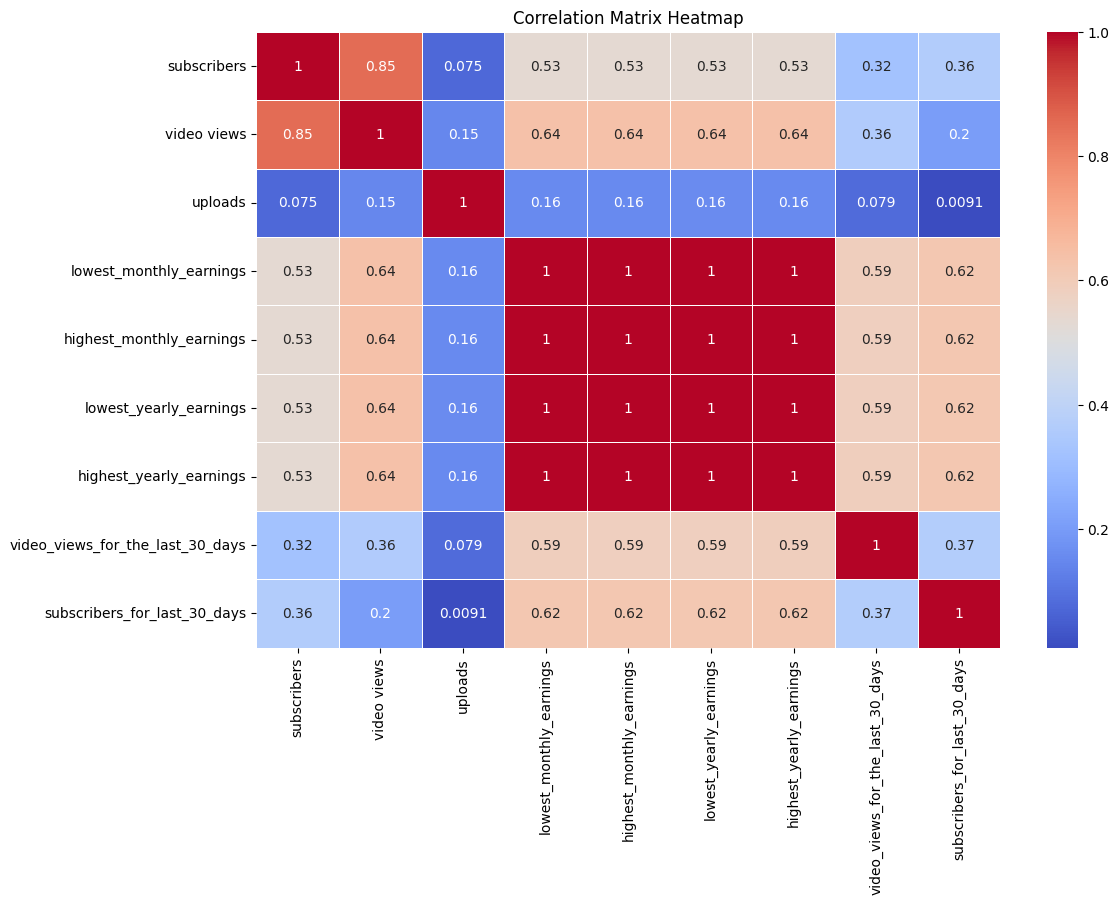

In [27]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


Explanation: We create a heatmap to visualize the correlation matrix, with annotations to show the correlation coefficients. This heatmap provides insights into how strongly each numerical variable is related to others.

Regression Models:

Linear Regression: To predict the number of subscribers for YouTube channels.

In [28]:
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# Select features and target variable
X = data[['video views', 'uploads']]
y = data['subscribers']

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [33]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 107379845764229.67
R-squared: 0.8670140324743885


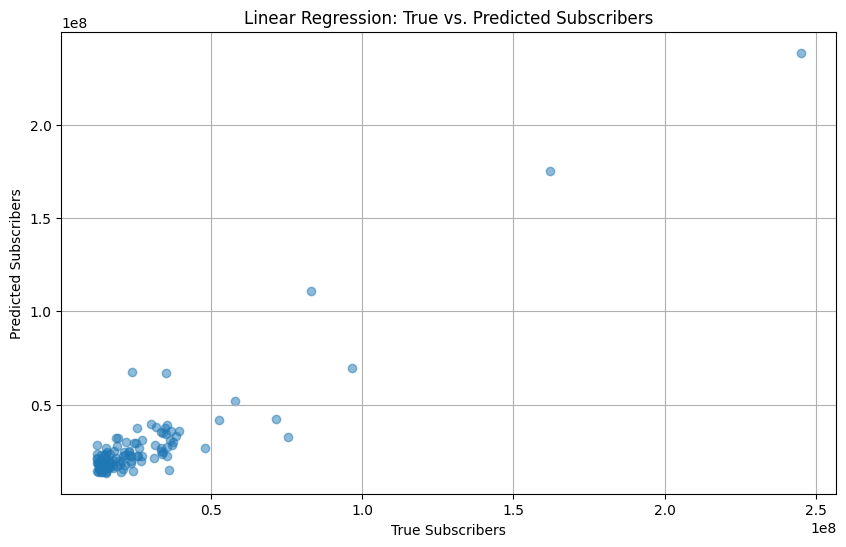

In [34]:
# Visualize Linear Regression predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Linear Regression: True vs. Predicted Subscribers')
plt.xlabel('True Subscribers')
plt.ylabel('Predicted Subscribers')
plt.grid(True)
plt.show()


Non-Linear Regression (e.g., Ridge, Lasso, ElasticNet): To handle complex relationships in predicting subscriber counts

In [35]:
# Import necessary libraries
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [36]:
# Create and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [37]:
# Create and train Lasso Regression model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

Lasso()

In [38]:
# Create and train ElasticNet Regression model
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet_model.fit(X_train, y_train)

ElasticNet()

In [39]:
# Make predictions using each model
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)
elasticnet_predictions = elasticnet_model.predict(X_test)

In [40]:

# Evaluate the models
ridge_mse = mean_squared_error(y_test, ridge_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
elasticnet_mse = mean_squared_error(y_test, elasticnet_predictions)

print("Ridge Mean Squared Error:", ridge_mse)
print("Lasso Mean Squared Error:", lasso_mse)
print("ElasticNet Mean Squared Error:", elasticnet_mse)

Ridge Mean Squared Error: 107379845764229.9
Lasso Mean Squared Error: 107379845764235.2
ElasticNet Mean Squared Error: 107379845764289.69


Classification Models:

Decision Trees or Random Forests: To classify channels as successful or not.

In [41]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset and preprocess if needed
# Select features and target variable
# Split the data into training and testing sets


In [42]:
# Create and train a Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
# Create and train a Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:

# Make predictions on the test set
decision_tree_predictions = decision_tree_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)

In [45]:
# Evaluate the models
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)

print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)

Decision Tree Accuracy: 0.009009009009009009
Random Forest Accuracy: 0.009009009009009009


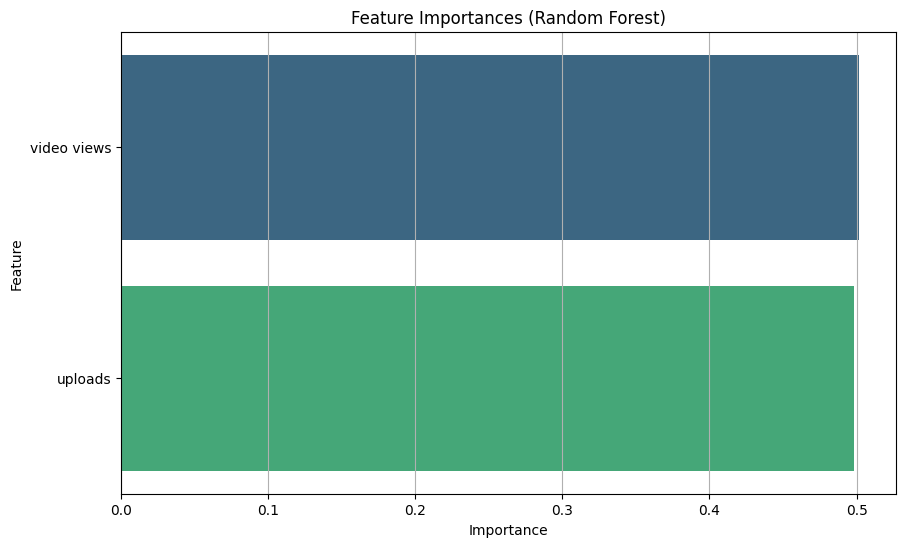

In [46]:
# Visualize feature importances from Random Forest Classifier
importances = random_forest_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()


Logistic Regression: To predict the channel type (individual or brand).



In [47]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression

# Load the dataset and preprocess if needed
# Select features and target variable
# Split the data into training and testing sets

In [48]:
# Create and train a Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [49]:
# Make predictions on the test set
logistic_regression_predictions = logistic_regression_model.predict(X_test)

In [50]:
# Evaluate the model
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)

print("Logistic Regression Accuracy:", logistic_regression_accuracy)

Logistic Regression Accuracy: 0.0


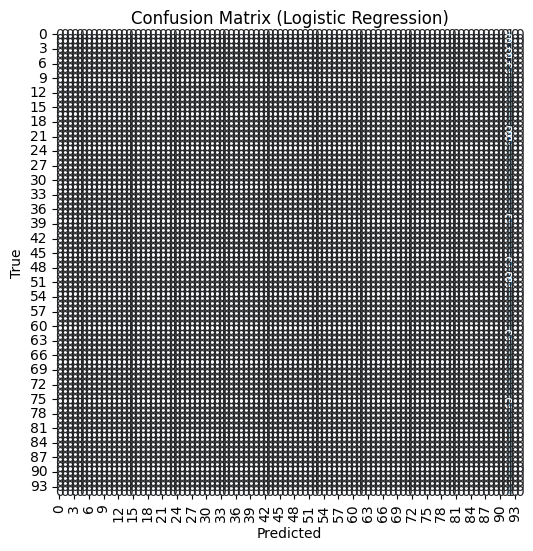

In [51]:
# Visualize the confusion matrix for Logistic Regression
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, logistic_regression_predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Sentiment Analysis on 'Title' Column:



In [52]:
# Import the necessary libraries
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Download the stop words list
nltk.download('stopwords')

# Get the titles as text data (assuming your column is named 'Title')
text_data = data['Title']

# Load the stop words list
stop_words = set(stopwords.words('english'))

# Clean and lowercase the text, remove punctuation
cleaned_text = text_data.str.lower().str.replace('[^\w\s]', '').str.split()

# Remove stop words from the cleaned text
filtered_text = [[word for word in doc if word not in stop_words] for doc in cleaned_text]

# Calculate term frequencies
flat_list = [item for sublist in filtered_text for item in sublist]
term_frequencies = Counter(flat_list)

# Show the most common terms and their frequencies
most_common_terms = term_frequencies.most_common(10)
print(most_common_terms)


[('-', 26), ('kids', 19), ('tv', 16), ('music', 14), ('official', 12), ('&', 11), ('news', 11), ('rhymes', 9), ('songs', 9), ('ýýýýýýýý', 9)]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pnrde\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
# Import the necessary libraries
from textblob import TextBlob

# Get the titles as a list (assuming your column is named 'Title')
titles = data['Title']

# Perform sentiment analysis for each title
sentiments = []
for title in titles:
    analysis = TextBlob(title)
    sentiment = analysis.sentiment.polarity  # Sentiment ranges from -1 (negative) to 1 (positive)
    sentiments.append(sentiment)

# Add the sentiment scores to your dataframe
data['Title_Sentiments'] = sentiments

# Examine the results
data.head()


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,channel_type,video_views_rank,...,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Title_Sentiment,Title_Sentiments
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,Music,1.0,...,6800000.0,108400000.0,2000000.0,2006.0,28.1,1.366418e+09,5.36,471031528.0,0.0,0.0
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,Entertainment,48.0,...,4000000.0,64700000.0,8000000.0,2012.0,88.2,3.282395e+08,14.70,270663028.0,0.0,0.0
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2.0,...,5900000.0,94800000.0,1000000.0,2006.0,88.2,3.282395e+08,14.70,270663028.0,0.0,0.0
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,Entertainment,3.0,...,5500000.0,87500000.0,1000000.0,2006.0,28.1,1.366418e+09,5.36,471031528.0,0.0,0.0
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,People,630.0,...,146800.0,2300000.0,100000.0,2016.0,81.9,1.443735e+08,4.59,107683889.0,0.0,0.0
